In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv"

df = pd.read_csv(url)

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

1. Dtataset overview

we will inspects the structure of the dataset, check data types, missing values, and basic statistics.

In [6]:
# Inspect datatypes  and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
# Checking for missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### 1.1 Missing Values Summary

| Column | Missing Values |
|---------|----------------|
| Gender | 13 |
| Married | 3 |
| Dependents | 15 |
| Self_Employed | 32 |
| LoanAmount | 22 |
| Loan_Amount_Term | 14 |
| Credit_History | 50 |

**Observation:**  
Roughly half of the features have some missing values, mostly in categorical variables (like Gender, Dependents) and numeric ones related to loan details.  
We'll later decide suitable imputation strategies based on their distributions.


## 2. Univariate Analysis

We'll start by exploring the numerical features to understand their distributions, detect skewness, and identify outliers.

In [8]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


There are few applicants with very high income/loan values, pulling the mean upward.

During preprocessing, these might need log transformation to normalize the data.

### 2.1 Numerical Features Summary

| Feature | Mean | Median | Skewness | Insight |
|----------|-------|--------|-----------|----------|
| ApplicantIncome | 5403 | 3812 | Right-skewed | A few applicants earn much higher incomes |
| CoapplicantIncome | 1621 | 1188 | Right-skewed | Some coapplicants contribute very large amounts |
| LoanAmount | 146 | 128 | Right-skewed | Some high-value loans may be outliers |

In [10]:
# plot histograms for numerical features
def univariate_numerical_data(df, column):
    """
    Peerform univariate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and bloxplot.
    """

    print(f" Feature: {column}")
    print("="*40)
    print(df[column].describe().to_frame())
    print(f"\nSkewness: {df[column].skew():.3f}")
    print(f"Kurtosis: {df[column].kurt():.3f}")

    plt.figure(figsize=(12,4))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins=30, color='teal')
    plt.title(f'\n Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color='teal')
    plt.title(f'\n Boxplot of {column}', fontsize=13)

    plt.tight_layout()
    plt.show()

    # Optional note on transformation
    if abs(df[column].skew()) > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation")
    elif abs(df[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric")

 Feature: ApplicantIncome
       ApplicantIncome
count       614.000000
mean       5403.459283
std        6109.041673
min         150.000000
25%        2877.500000
50%        3812.500000
75%        5795.000000
max       81000.000000

Skewness: 6.540
Kurtosis: 60.541


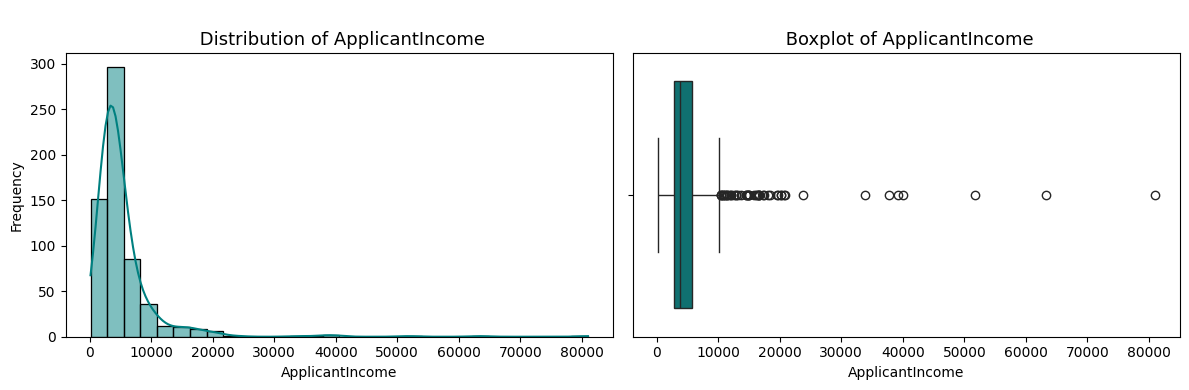


 ApplicantIncome is highly skewed. Consider log or Box-Cox transformation
 Feature: CoapplicantIncome
       CoapplicantIncome
count         614.000000
mean         1621.245798
std          2926.248369
min             0.000000
25%             0.000000
50%          1188.500000
75%          2297.250000
max         41667.000000

Skewness: 7.492
Kurtosis: 84.956


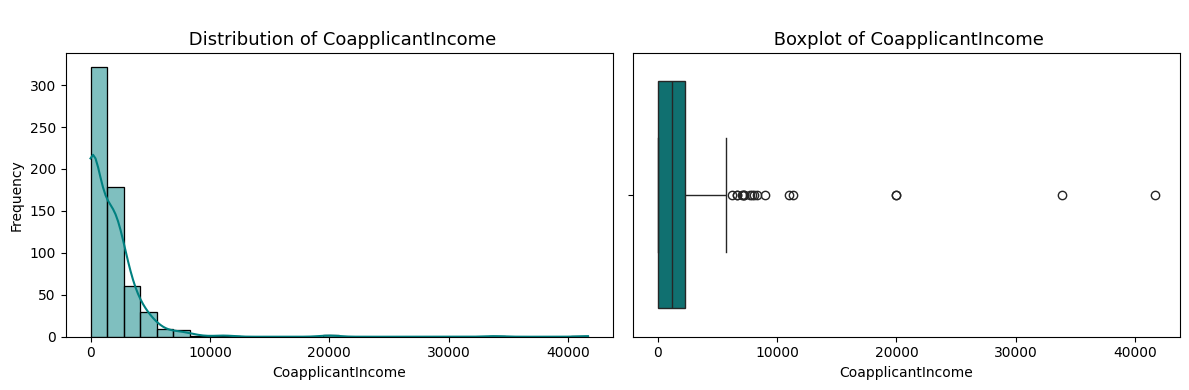


 CoapplicantIncome is highly skewed. Consider log or Box-Cox transformation
 Feature: LoanAmount
       LoanAmount
count  592.000000
mean   146.412162
std     85.587325
min      9.000000
25%    100.000000
50%    128.000000
75%    168.000000
max    700.000000

Skewness: 2.678
Kurtosis: 10.402


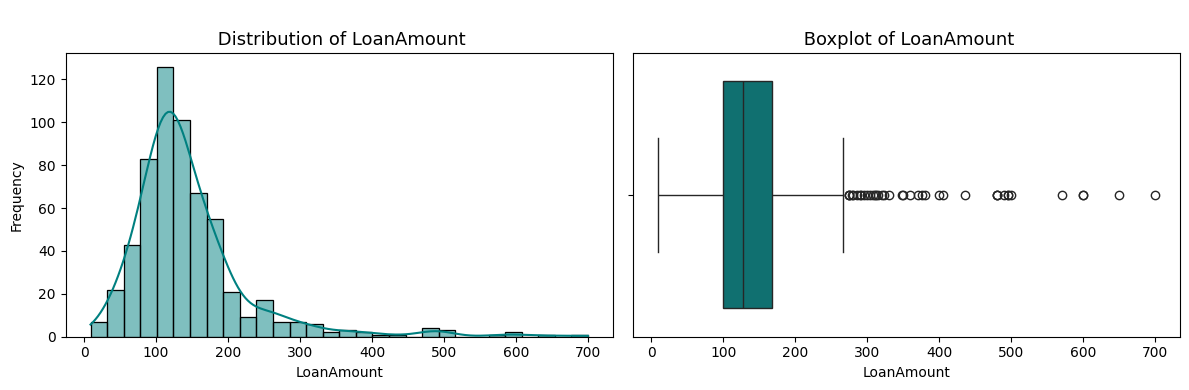


 LoanAmount is highly skewed. Consider log or Box-Cox transformation
 Feature: Loan_Amount_Term
       Loan_Amount_Term
count         600.00000
mean          342.00000
std            65.12041
min            12.00000
25%           360.00000
50%           360.00000
75%           360.00000
max           480.00000

Skewness: -2.362
Kurtosis: 6.673


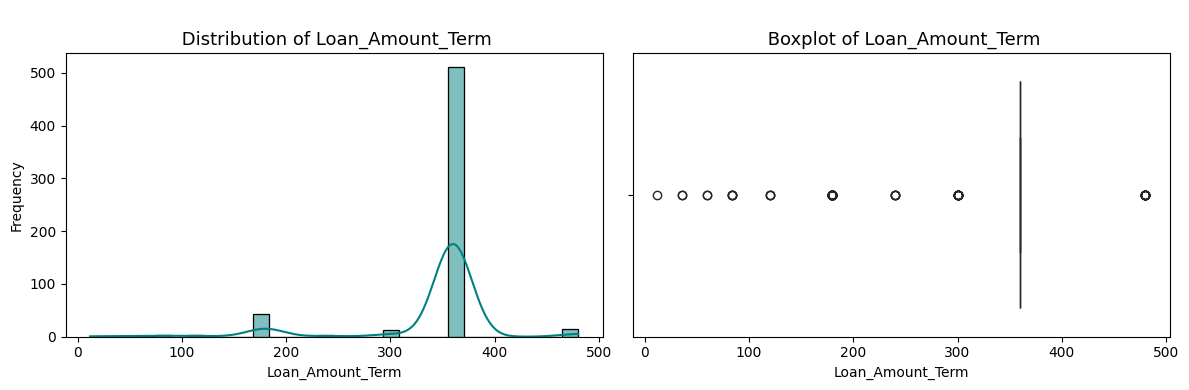


 Loan_Amount_Term is highly skewed. Consider log or Box-Cox transformation
 Feature: Credit_History
       Credit_History
count      564.000000
mean         0.842199
std          0.364878
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000

Skewness: -1.882
Kurtosis: 1.549


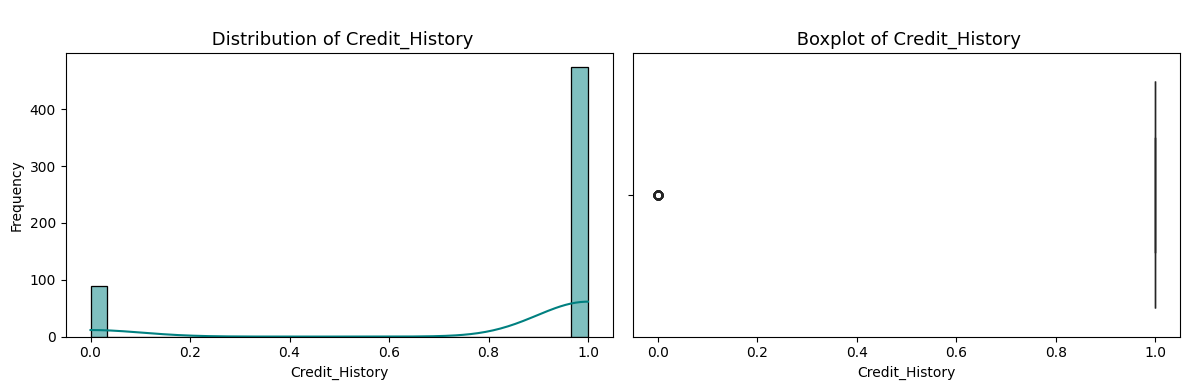


 Credit_History is highly skewed. Consider log or Box-Cox transformation


In [11]:
for col in numeric_cols:
    univariate_numerical_data(df, col)

In [12]:
# Select categorical columns (excluding Loan_ID)
cat_cols = df.select_dtypes(include='object').columns.drop('Loan_ID')

for col in cat_cols:
    print(f"\nValue counts for {col}:\n")
    print(df[col].value_counts(dropna=False))


Value counts for Gender:

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

Value counts for Married:

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

Value counts for Dependents:

Dependents
0      345
1      102
2      101
3+      51
NaN     15
Name: count, dtype: int64

Value counts for Education:

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

Value counts for Self_Employed:

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64

Value counts for Property_Area:

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

Value counts for Loan_Status:

Loan_Status
Y    422
N    192
Name: count, dtype: int64


### 2.4 Summary of Categorical Variables

| Feature | Most Common Class | Comment |
|----------|------------------|----------|
| Gender | Male | Strong imbalance, few missing values |
| Married | Yes | Majority married applicants |
| Dependents | 0 | Most have no dependents |
| Education | Graduate | Very imbalanced |
| Self_Employed | No | Majority not self-employed, some missing |
| Property_Area | Semiurban | Reasonably balanced |
| Loan_Status | Y (Approved) | Slight imbalance, more approvals |

**Observation:**  
Some categorical features are imbalanced, but that’s typical for loan datasets.  
We’ll later consider encoding and possibly rebalancing the target during modeling.

## 3. Bivariate Analysis

We'll explore how categorical and numeric variables relate to the target variable (`Loan_Status`).

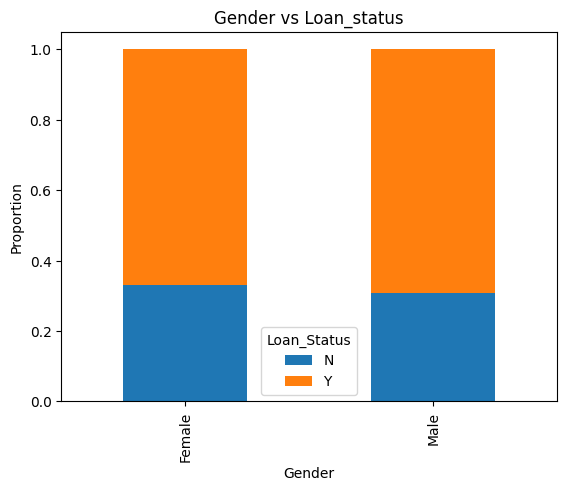

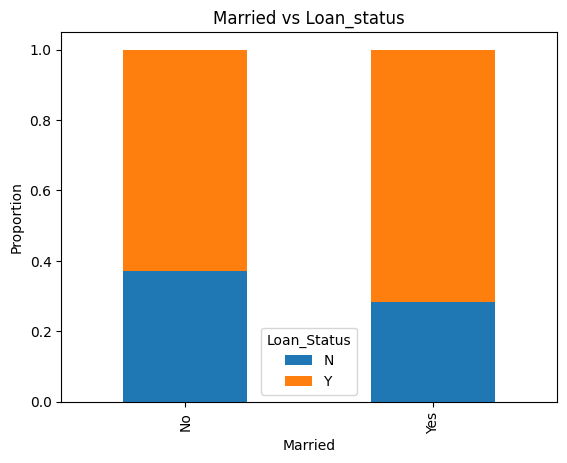

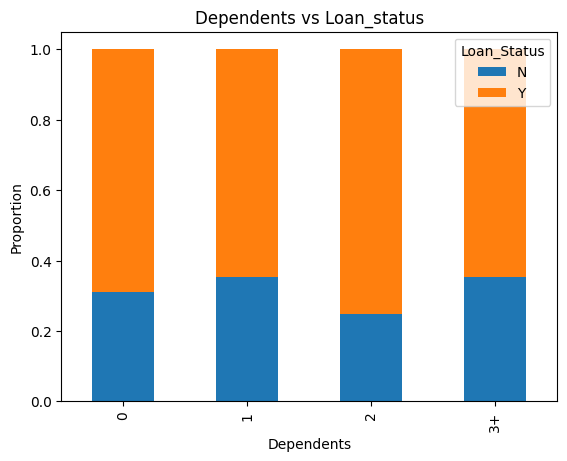

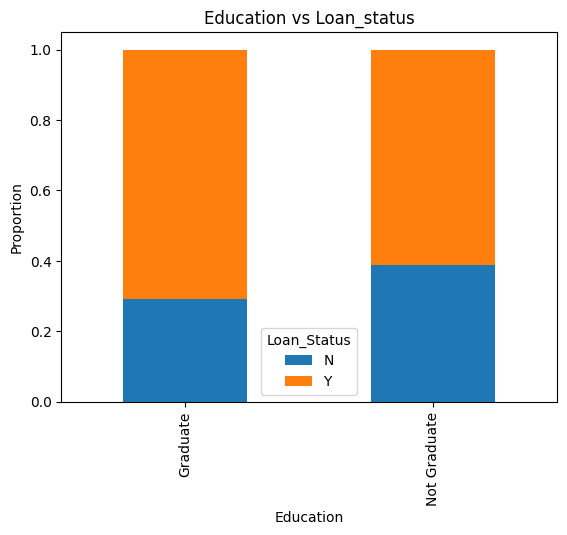

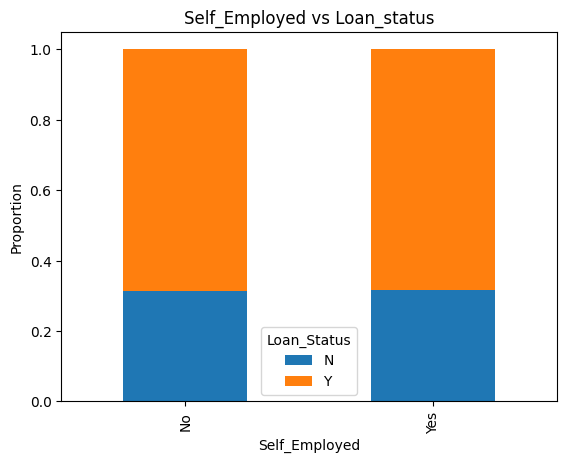

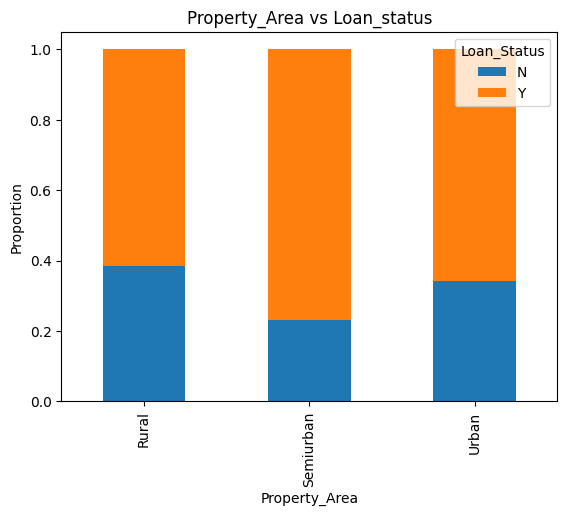

In [13]:
# Relationship between categorical features and Loan_Status
for col in cat_cols:
    if col != 'Loan_Status':
        cross_tab = pd.crosstab(df[col], df['Loan_Status'], normalize='index')
        cross_tab.plot(kind='bar', stacked=True)
        plt.title(f"{col} vs Loan_status")
        plt.ylabel('Proportion')
        plt.show()

### 3.1 Categorical Features vs Loan Status

- **Property_Area:** Applicants from *Semiurban* areas have the highest loan approval rate.  
- **Self_Employed:** Slight difference — non–self-employed applicants tend to be approved more often.  
- **Education:** Graduates show slightly higher approval rates than Non-Graduates.  
- **Married:** Married applicants appear slightly more likely to be approved.  

**Observation:**  
Property_Area seems to have the strongest influence on loan approval, followed by Education and Self_Employed.

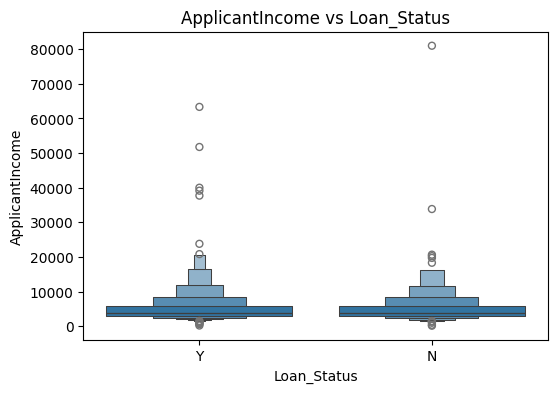

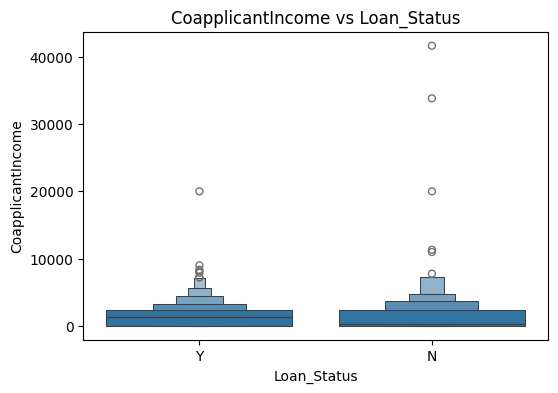

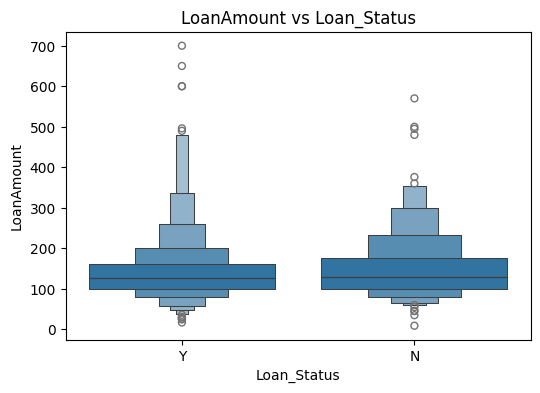

In [16]:
# Compare numeric features vs Loan-Status
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxenplot(x='Loan_Status', y=col, data=df)
    plt.title(f"{col} vs Loan_Status")
    plt.show()

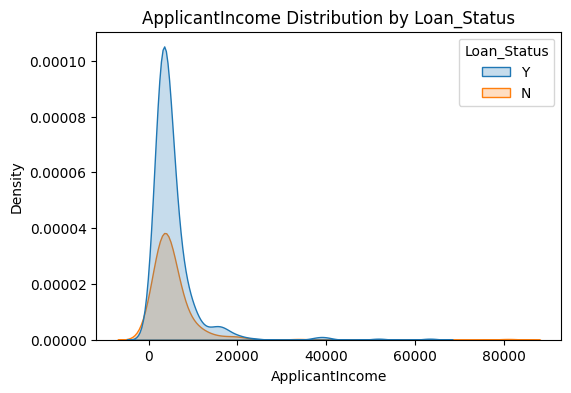

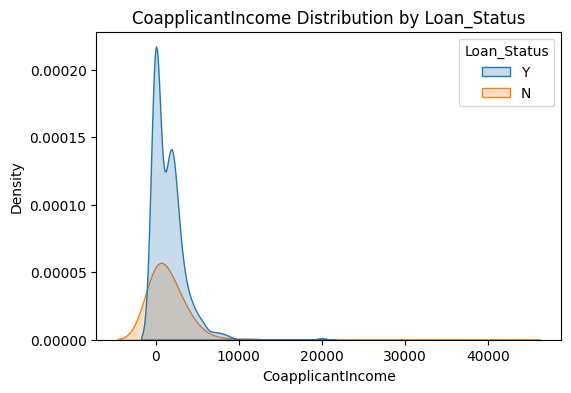

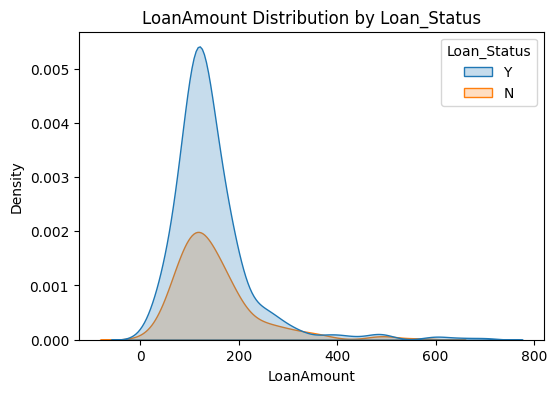

In [17]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue='Loan_Status', fill=True)
    plt.title(f"{col} Distribution by Loan_Status")
    plt.show()

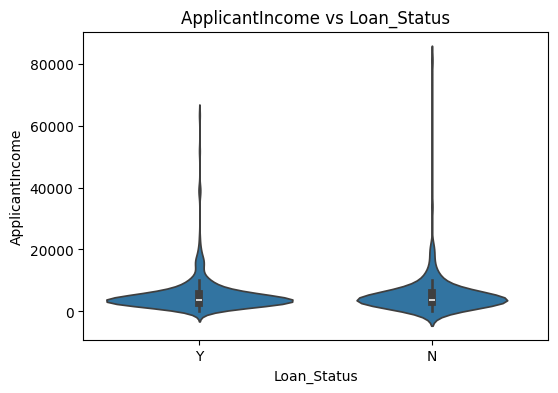

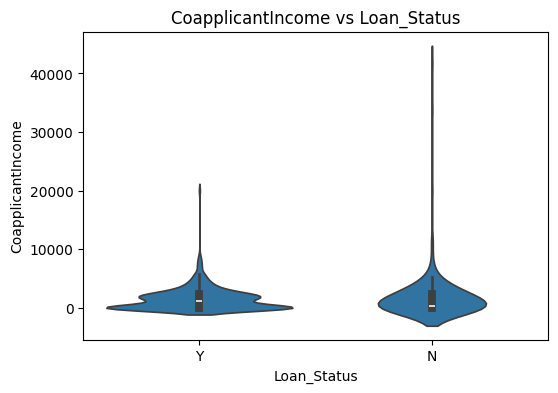

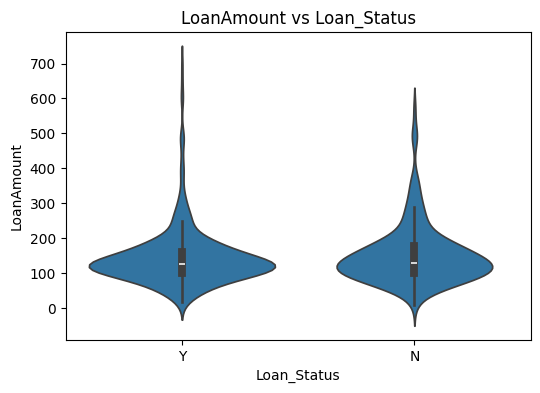

In [18]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='Loan_Status', y=col, data=df, inner='box')
    plt.title(f"{col} vs Loan_Status")
    plt.show()

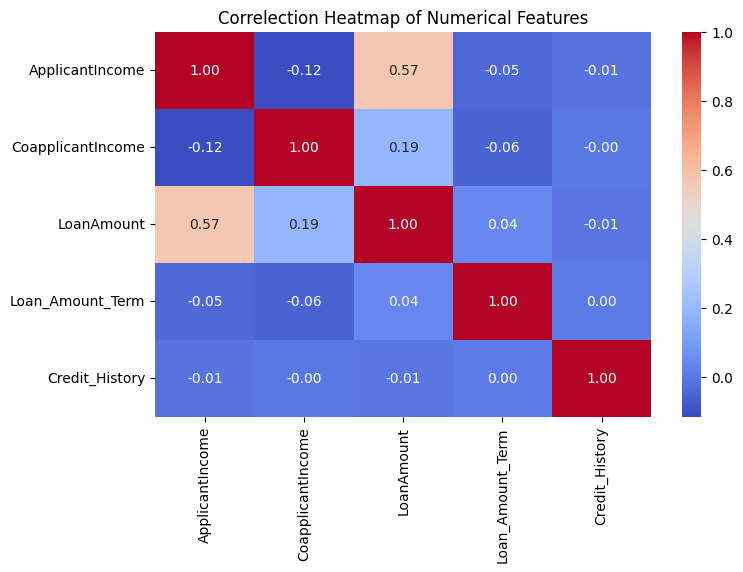

In [19]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlection Heatmap of Numerical Features")
plt.show()

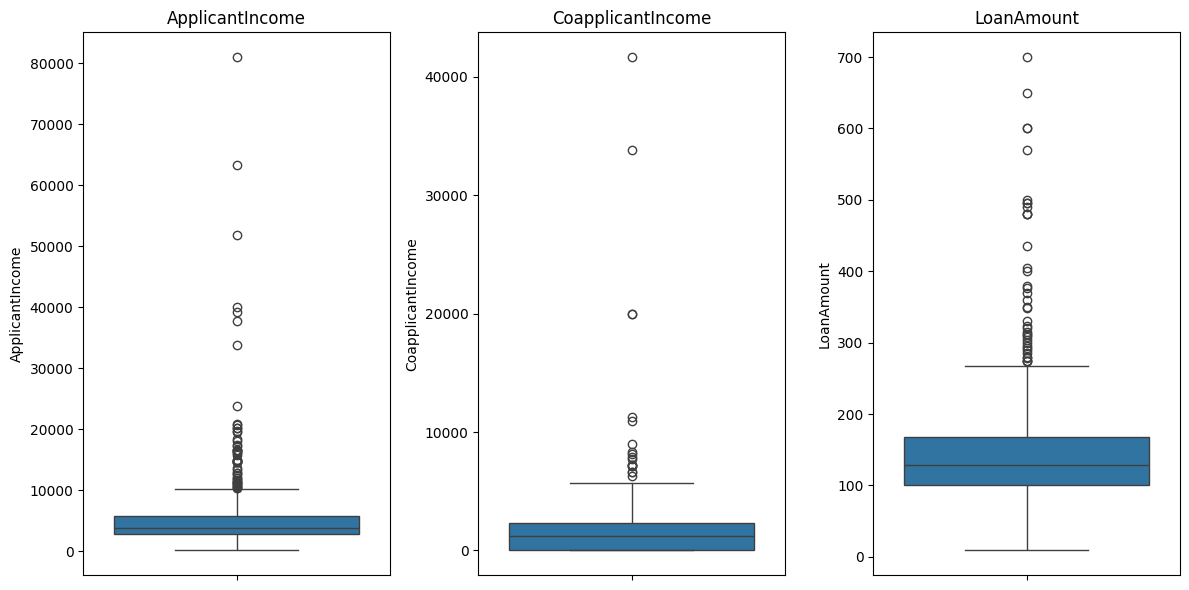

In [20]:
plt.figure(figsize=(12, 6))

for i, col in enumerate(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
1